## Урок 2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск.

In [36]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 14, 'figure.figsize': [12.0, 6.0]})

In [37]:
# К признаку стажа добавим новые признаки
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  # стаж
              [500, 700, 750, 600, 1450,        # средняя стоимость занятия
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])  # квалификация репетитора
               
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

### Нормализация [0, 1]

$$x_{ij} = \frac{x_{ij} - min_{j} (x_{ij})}{max_{j} (x_{ij})-min_{j} (x_{ij})}$$

### Стандартизация

$$x_{ij}=\frac{x_{ij} - \mu_{j}}{\sigma_{j}}$$

In [38]:
X_st = X.copy().astype(np.float64)

X_st[1] = (X[1] - X[1].mean()) / X[1].std()
X_st[1]

array([-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
       -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571])

In [39]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [40]:
X_st[2] = calc_std_feat(X[2])
X_st[3] = calc_std_feat(X[3])
print(X_st[2])
print(X_st[3])

[-0.97958969 -0.56713087 -0.46401617 -0.77336028  0.97958969 -0.36090146
  1.08270439  2.11385144 -1.08270439  0.05155735]
[-0.89625816 -0.89625816  0.38411064 -0.89625816  0.38411064 -0.89625816
  1.66447944  1.66447944 -0.89625816  0.38411064]


In [41]:
### L1 регуляризация - Lasso

$$\sum^{n}_{i=1}L_i(\vec{x}_i,{y_i},\vec{w}) + \lambda \sum^{m}_{j=1}|w_{j}| \rightarrow \underset{w}{\text{min}}$$

In [42]:
### L2 регуляризация - Ridge

$$\sum^{n}_{i=1}L_i(\vec{x}_i,y_i,\vec{w}) + \lambda \sum^{m}_{j=1}w_{j}^{2} \rightarrow \underset{w}{\text{min}}$$

In [43]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations + 1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + 2 * lambda_ * W) 

    return W

### Домашние задания

#### 1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).  

In [44]:
def build_mse_plots(lambdas, model):
#     %matplotlib widget
    for l in lambdas:
        W = model(X_st, y, iterations=10000, alpha=1e-2, lambda_=l)
        plt.plot(range(len(W)), W, label=f'λ = {l}')
        plt.legend()
    plt.xlabel('Iteration number')
    plt.ylabel('Weights');

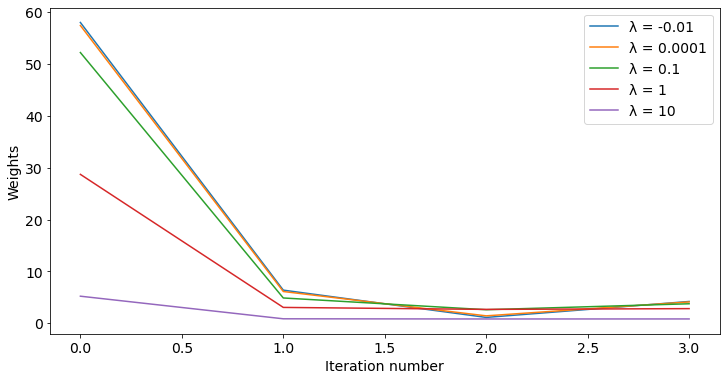

In [45]:
lambdas = [-10e-3, 10e-5, 10e-2, 1, 10]

build_mse_plots(lambdas, eval_model_reg2)

#### 2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?  

Можно, но зачем? Нормализация и стандартизация делают разные вещи: нормализация преобразует данные в диапазоне [0, 1], стандартизация преобразует данные так, что полученное распределение имело среднее =0 и стандартное отклонение =1, то есть данные методики минимизации взаимозаменяемы и взаимоисключаемы.

#### 3. *Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [46]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations + 1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
#       невозможно определить направление градиента, поэтому вместо abs(W) возьмём знак W
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * np.sign(W)) 
    
    return W

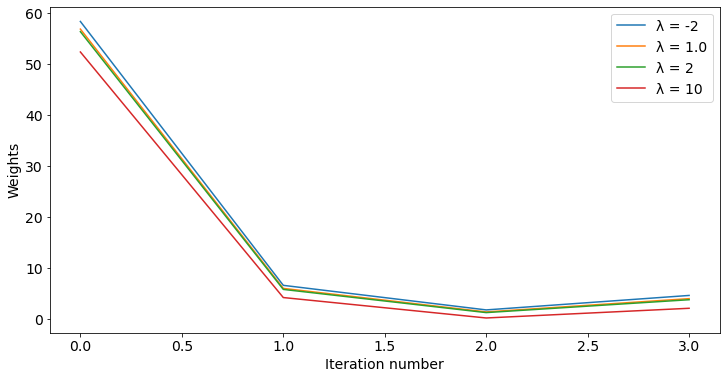

In [47]:
lambdas = [-2, 10e-1, 2, 10]
build_mse_plots(lambdas, eval_model_reg1)